In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df = pd.read_csv("data/lof/data-lof-2024-04-01.csv")

In [3]:
df["province"].value_counts()

province
Ontario                    32102
British Columbia           18114
Alberta                    10958
Quebec                      6869
Saskatchewan                3513
Manitoba                    2378
Nova Scotia                 1597
New Brunswick               1137
Prince Edward Island         342
Newfoundland & Labrador      318
Yukon                         81
Northwest Territories         46
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77455 non-null  float64
 1   id_mls                    77455 non-null  object 
 2   bathrooms_total           77455 non-null  float64
 3   bedrooms_extra            77455 non-null  float64
 4   bedrooms                  77455 non-null  float64
 5   stories_total             77455 non-null  float64
 6   size_interior             77455 non-null  float64
 7   building_type             77455 non-null  object 
 8   agency_name               77455 non-null  object 
 9   agency_type               77455 non-null  object 
 10  property_type             77455 non-null  object 
 11  lng                       77455 non-null  float64
 12  lat                       77455 non-null  float64
 13  ownership_type            77455 non-null  object 
 14  owners

In [5]:
df_dem = pd.read_csv("data/LocalLogic/Demographics/demographics-2024-04-01.csv")
df_loc = pd.read_csv("data/LocalLogic/Locations/locations-2024-04-01.csv")

df = pd.merge(df, df_dem, on="id")
df = pd.merge(df, df_loc, on="id")

In [6]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98885 entries, 0 to 98884
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       98885 non-null  int64  
 1   loc_high_schools         98814 non-null  float64
 2   loc_primary_schools      98814 non-null  float64
 3   loc_transit_friendly     98814 non-null  float64
 4   loc_groceries            98814 non-null  float64
 5   loc_wellness             98814 non-null  float64
 6   loc_restaurants          98814 non-null  float64
 7   loc_pedestrian_friendly  98814 non-null  float64
 8   loc_greenery             98814 non-null  float64
 9   loc_cycling_friendly     98814 non-null  float64
 10  loc_car_friendly         98814 non-null  float64
 11  loc_vibrant              98814 non-null  float64
 12  loc_shopping             98814 non-null  float64
 13  loc_daycares             98814 non-null  float64
 14  loc_nightlife         

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          77455 non-null  float64
 1   id_mls                      77455 non-null  object 
 2   bathrooms_total             77455 non-null  float64
 3   bedrooms_extra              77455 non-null  float64
 4   bedrooms                    77455 non-null  float64
 5   stories_total               77455 non-null  float64
 6   size_interior               77455 non-null  float64
 7   building_type               77455 non-null  object 
 8   agency_name                 77455 non-null  object 
 9   agency_type                 77455 non-null  object 
 10  property_type               77455 non-null  object 
 11  lng                         77455 non-null  float64
 12  lat                         77455 non-null  float64
 13  ownership_type              774

In [8]:
df["province"].value_counts()

province
Ontario                    32102
British Columbia           18114
Alberta                    10958
Quebec                      6869
Saskatchewan                3513
Manitoba                    2378
Nova Scotia                 1597
New Brunswick               1137
Prince Edward Island         342
Newfoundland & Labrador      318
Yukon                         81
Northwest Territories         46
Name: count, dtype: int64

## First Glance

In [9]:
df.head()

,id,id_mls,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
0,26639235.0,24005541,3.0,0.0,4.0,2.5,2810.000000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,0.0,3.5,3.0,1.5,2.5,5.0,2.0,3.0,5.0,3.5
1,26639230.0,24005774,2.0,0.0,2.0,1.0,1072.000000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,0.0,3.0,4.5,1.0,3.0,4.5,0.5,1.5,4.5,3.5
2,26639229.0,24005776,3.0,0.0,4.0,2.0,1965.881818,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,0.0,2.5,4.0,0.5,1.0,5.0,0.0,1.0,5.0,0.0
3,26639225.0,24005786,1.0,0.0,4.0,1.0,1040.426146,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,0.0,3.5,3.5,2.0,2.0,4.0,2.0,2.5,3.0,3.5
4,26638943.0,24005775,1.0,0.0,3.0,1.0,3718.455676,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,0.0,3.0,4.0,1.5,2.0,4.0,1.5,2.0,4.0,3.5


## Removing Unwanted Features

In [10]:
df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)

# df = df[["bathrooms_total",
#     "bedrooms_extra",
#     "bedrooms",
#     "stories_total",
#     "size_interior",
#     "building_type",
#     "lng",
#     "lat",
#     "ownership_type_group_ids",
#     "parkings",
#     "province",
#     "price"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bathrooms_total             77455 non-null  float64
 1   bedrooms_extra              77455 non-null  float64
 2   bedrooms                    77455 non-null  float64
 3   stories_total               77455 non-null  float64
 4   size_interior               77455 non-null  float64
 5   building_type               77455 non-null  object 
 6   lng                         77455 non-null  float64
 7   lat                         77455 non-null  float64
 8   ownership_type_group_ids    77455 non-null  int64  
 9   parkings                    77455 non-null  float64
 10  province                    77455 non-null  object 
 11  price                       77455 non-null  float64
 12  household_income            76753 non-null  float64
 13  individual_income           767

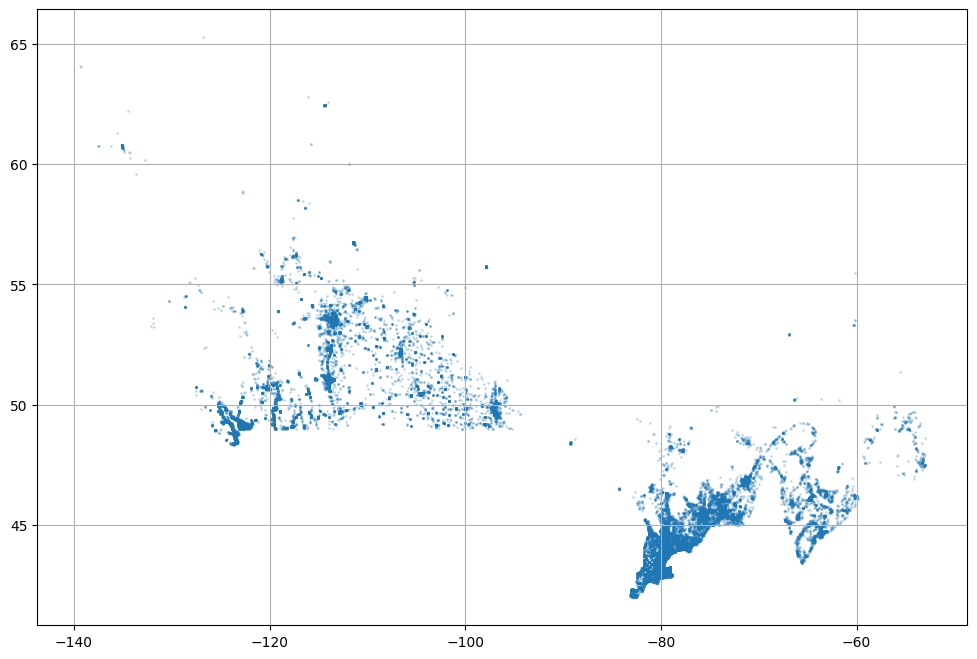

In [11]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(df["lng"], df["lat"], alpha=0.2, s=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bathrooms_total             77455 non-null  float64
 1   bedrooms_extra              77455 non-null  float64
 2   bedrooms                    77455 non-null  float64
 3   stories_total               77455 non-null  float64
 4   size_interior               77455 non-null  float64
 5   building_type               77455 non-null  object 
 6   lng                         77455 non-null  float64
 7   lat                         77455 non-null  float64
 8   ownership_type_group_ids    77455 non-null  int64  
 9   parkings                    77455 non-null  float64
 10  province                    77455 non-null  object 
 11  price                       77455 non-null  float64
 12  household_income            76753 non-null  float64
 13  individual_income           767

In [13]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [14]:
# df = df.to_numpy()

In [15]:
# cat_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=9999999)
cat_encoder = OneHotEncoder()

df_enc = cat_encoder.fit_transform(df)
# df_sample_enc = cat_encoder.transform(df_sample)

In [16]:
df_enc.shape

(77455, 656837)

In [17]:
df_enc

<77455x656837 sparse matrix of type '<class 'numpy.float64'>'
	with 5344395 stored elements in Compressed Sparse Row format>

In [18]:
df_enc = pd.get_dummies(df[df["province"] == "Quebec"])
df_enc.shape

(6869, 72)

In [19]:
np.round(df_enc.describe())

,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,price,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
count,6869.0,6869.0,6869.0,6869.0,6869.0,6869.0,6869.0,6869.0,6869.0,6869.0,...,6864.0,6864.0,6864.0,6864.0,6864.0,6864.0,6864.0,6864.0,6864.0,6864.0
mean,2.0,0.0,3.0,1.0,1485.0,-73.0,46.0,0.0,4.0,598381.0,...,1.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0
std,1.0,0.0,1.0,0.0,611.0,2.0,1.0,1.0,3.0,392940.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
min,0.0,0.0,0.0,1.0,370.0,-79.0,45.0,0.0,0.0,119000.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,2.0,1.0,1059.0,-75.0,45.0,0.0,2.0,365000.0,...,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
50%,2.0,0.0,3.0,1.0,1348.0,-74.0,46.0,0.0,3.0,495000.0,...,0.0,2.0,4.0,0.0,2.0,2.0,0.0,1.0,4.0,0.0
75%,2.0,0.0,4.0,2.0,1794.0,-72.0,47.0,0.0,5.0,699000.0,...,2.0,3.0,5.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0
max,3.0,0.0,5.0,3.0,4570.0,-61.0,50.0,2.0,12.0,5999000.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [20]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6869 entries, 19435 to 75728
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bathrooms_total                6869 non-null   float64
 1   bedrooms_extra                 6869 non-null   float64
 2   bedrooms                       6869 non-null   float64
 3   stories_total                  6869 non-null   float64
 4   size_interior                  6869 non-null   float64
 5   lng                            6869 non-null   float64
 6   lat                            6869 non-null   float64
 7   ownership_type_group_ids       6869 non-null   int64  
 8   parkings                       6869 non-null   float64
 9   price                          6869 non-null   float64
 10  household_income               6836 non-null   float64
 11  individual_income              6836 non-null   float64
 12  commute_transit                6836 non-null   f

In [21]:
# dropna?
# df_enc = df_enc.dropna()

In [22]:
from sklearn. preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(df_enc.drop("price", axis=1))
y_scaled = scaler_y.fit_transform(np.array(df_enc["price"]).reshape(-1,1))

In [23]:
df_enc.corr(numeric_only=True)["price"].sort_values(ascending=False).head(20)

price                         1.000000
size_interior                 0.591224
bathrooms_total               0.436610
individual_income             0.406598
household_income              0.406598
lang_en_and_fr                0.393406
edu_post_graduate_degree      0.381722
edu_bachelor_degree           0.370807
edu_university_certificate    0.350773
loc_greenery                  0.309501
bedrooms                      0.281544
stories_total                 0.256268
loc_wellness                  0.223974
loc_parks                     0.212877
commute_transit               0.201713
commute_bicycle               0.192721
loc_transit_friendly          0.190615
lang_other                    0.173649
lang_en_only                  0.171880
total_individuals             0.163310
Name: price, dtype: float64

In [24]:
from sklearn.model_selection import cross_val_score, KFold


In [25]:
kf = KFold(n_splits=5)

In [26]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(max_depth=5)

In [27]:
cross_val_score(rf, X_scaled, y_scaled, cv=kf, scoring="r2")

/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/sit

array([0.25360233, 0.53722626, 0.39040834, 0.38306871, 0.50178313])

In [28]:
from xgboost import XGBRegressor

In [29]:
xgb = XGBRegressor()

In [30]:
cross_val_score(xgb, X_scaled, y_scaled, cv=kf, scoring="r2")

array([0.33390569, 0.67221676, 0.37463787, 0.43429945, 0.53218081])

In [31]:
xgb.fit(X_scaled, y_scaled)
y_pred = xgb.predict(X_scaled)

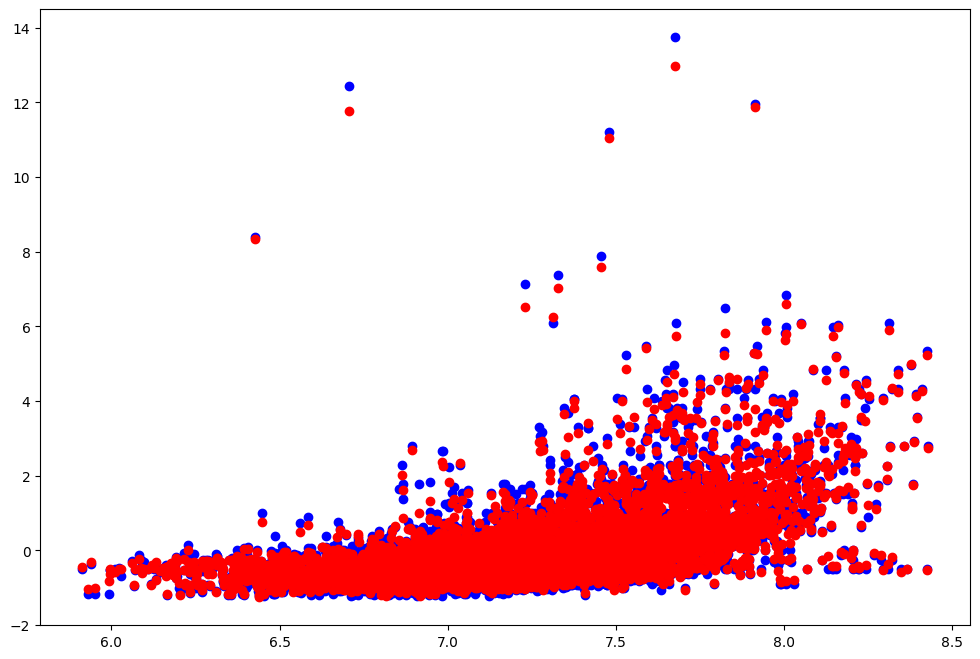

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(np.log(df_enc["size_interior"]), y_scaled, c="blue")
plt.scatter(np.log(df_enc["size_interior"]), y_pred, c="red")

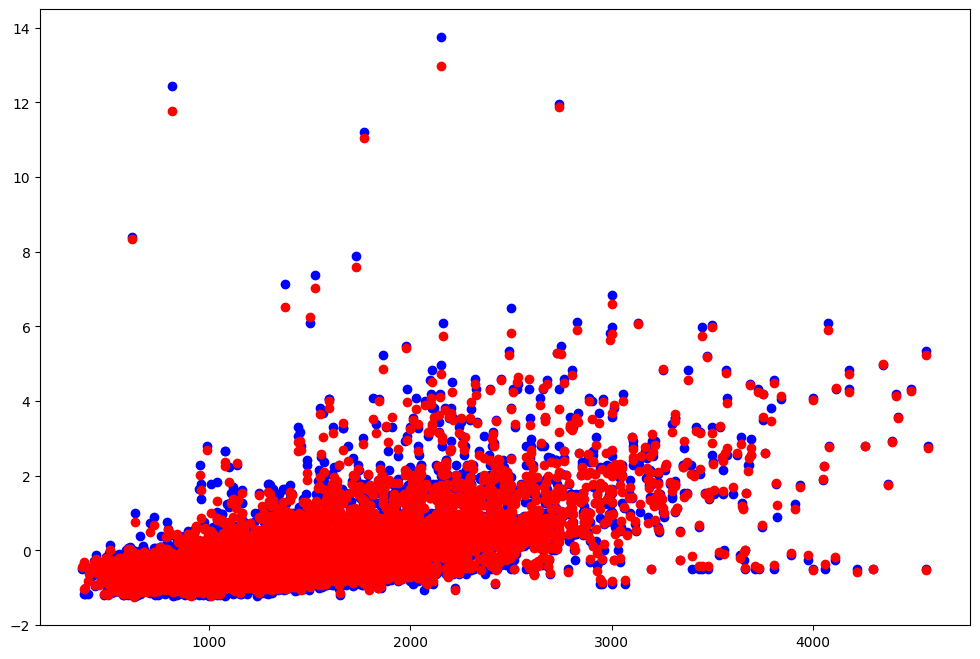

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(df_enc["size_interior"], y_scaled, c="blue")
plt.scatter(df_enc["size_interior"], y_pred, c="red")

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [35]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5633434982256338

In [37]:
X_train.shape

(5495, 71)

In [38]:
y_test.shape

(1374, 1)

In [39]:
y_pred.shape

(1374,)

In [40]:
df_enc[~((df_enc["household_income"].isna()) | (df_enc["loc_parks"].isna()))].shape

(6834, 72)

In [41]:
df_enc[(df_enc["household_income"].notna()) & df_enc["loc_parks"].notna()].shape

(6834, 72)

In [42]:
df_enc.dropna().shape

(6834, 72)

In [43]:
# We therefore conclude that XGBoost and RandomForest Ignore the samples with NA